<a href="https://colab.research.google.com/github/marymuench/Causal-Relationships-in-Mental-Health-and-Unemployment-Status/blob/main/MaryMuench_DataWrangling_Mod_5_Assignment_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# DS 2500 Data Wrangling Module 5 Assignment -- Inference
Mary Muench

u1196723

#Topic

For this assignment, I will be examining the interactions of mental health and unemployment status. The article I will be reviewing is "...people with mental illness are less likely to work (1-10), and those who do work earn less than workers without mental illness (1, 9)" from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4182106/ and the dataset I will examine is found at https://www.kaggle.com/datasets/michaelacorley/unemployment-and-mental-illness-survey. 


**Context:** The article was built off of a study that surveyed 77,326 working age adults from 2009-2010. In order to analyze the data, the study used descriptive analyses to compute employment rates, sociodemographic characteristics, and other employment outcomes across different mental illness severity categories. Then, multivariate logistic regression was used to find factors that were associated with employment disparaties based on mental illness categorization. 

# Summarize

{ What argument does the article make?
 What is the primary causal mechanism being claimed? }

The article provided argues that people who experience severe mental illness are more likely to be unemployed and typically make a lower salary than those who do not experience high levels of mental illness. The primary causal mechanism being claimed in confounding causation (A causes X and Y) in that severe mental illness (A) causes higher likelihood in being unemployed (X) and a lower salary on average (Y). The primary outcome variable was employment. 

# Identify

{  Identify alternative causal relationships. Use Hill’s framework to make a case for how this alternative could be a better explanation for the observed relationship. What kinds of data could illustrate this alternative relationship? What metrics would you employ to assess the superior explanation? }

This section will begin to identify alternative causal relationships. It is relevant to note that the article discusses how the study took into account certain external factors, such as categorizing participants into substance abuse categories, measuring general health status and collapsing the "fair" and "poor" categories, and collecting sociodemographic characteristics. 


  Let 
     
      A = severe mental illness
      X = likelihood of unemployment
      Y = lower average salary

Alternative causal relationships could include:
* Multiple causation: X and Y cause A
* Simple causation: X causes A or Y causes A
* Simple causation: A causes X or A causes Y

For this investigation, I will examine the alernative causal relationship that X and Y cause A. In order to investigate this causal relationship, I will separate the dataframe into employed and unemployed, as well divide the data frames separately into higher/lower salaries (categorized by dividing in half), and seeing how the percentages of people with mental illness compare. I will then perform analyses and statistical tests on the two sets of data for each investigative variable in order to assess the explanation. The percentages will serve as metrics of probability to have a mental illness based on the category presented. I will also utilize p-values to assess which of the two studies produce stronger statistically significant results. 

Hill's Framework on the Alternative Causal Mechanism:
1. Strength: While this article looks at likelihood to be unemployed and average salaries based on mental health categorization, it does not view groups of unemployed people or people with lower salaries and their likelihood to be experiencing a mental illness. Both directions have the opportunity to have high strength causal relationships, but if the group of unemployed or lower salaries have a higher likelihood to be experiencing a mental illness, that could indicate that this alternative causal relationship is stronger. 
2. Consistency: The effect has the opportunity to be replicated with a new sample set. 
3. Specificity: Unemployment status, salary level, and mental illness are all complex variables that may interact with each other but are not exclusive of external factors. Unemployment status can be impacted by the economy, work performance, skills, etc, in addition to mental health status. Lower salaries are impacted by location and cost of living, the type of profession one is in, years of experience, etc. Mental illness can be correlated to interpersonal relationships, employment, financial struggles, living situations, weather, and much more. However, for the investigation into how unemployment status and lower salary cause mental illness, these external factors can be generalized and dissolved across a larger sample size, representing a specified causal relationship without the impression of these external factors. 
4. Temporality: Under the assunmption that unemployment and lower salaries cause mental illness, it is possible that mental illness comes first or is only exacurbated by unemployment and lower salaries. However, the same can be said for the primary causal mechanism the article claims. 
5. Gradient: Prolonged unemployment or lower salaries, categorizing financial insecurity, to a more severe extent has the opportunity to cause a more severe mental health crisis, as seen in the high rates of mental illness in the population experiencing homelessness. 
6. Plausibility: The causal mechanism makes sense. Unemployement and lower salaries are indicators of financial insecurity, which can cause high amounts of anxiety, stress, and depression, which are all symptoms or subsectors of mental illness. 
7. Coherence: This causal mechanism is compatible with other evidence, as referenced in (5) with the high levels of mental illness in the population experiencing homelessness.
8. Experiment: Experiments can reproduce the effect and the investigation does not use any irreproducable values such as random values. 
9. Analogy: The causal mechanism is similar to other established mechanisms, such as the one analyzed in the article provided. 

# Analyze

{ Perform an EDA combining the data in the original argument with data for your alternative relationship. Show examples of each causal relationship. Report, compare, and interpret the assessment metrics you identified. }

**First, read in data**

In [ ]:
data = pd.read_csv('Unemployment_MentalHealth_Survey_Kaggle.csv')
data

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,High School or GED,1,0,NaN,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.0,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet


**Now perform a quick EDA on the data**

* check the packaging
* look at top and bottom of data
* check the "n"s
* validate against an external source

In [ ]:
data.shape

(334, 31)

In [ ]:
data.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [ ]:
data.tail()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
329,0,0,High School or GED,1,0,NaN,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.0,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet
333,1,1,Some Undergraduate,1,0,0.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,18-29,Female,"$10,000-$24,999",Pacific,Android Phone / Tablet


In [ ]:
data.dtypes

I am currently employed at least part-time                        int64
I identify as having a mental illness                             int64
Education                                                        object
I have my own computer separate from a smart phone                int64
I have been hospitalized before for my mental illness             int64
How many days were you hospitalized for your mental illness     float64
I am legally disabled                                             int64
I have my regular access to the internet                          int64
I live with my parents                                            int64
I have a gap in my resume                                         int64
Total length of any gaps in my resume in months.                  int64
Annual income (including any social welfare programs) in USD      int64
I am unemployed                                                   int64
I read outside of work and school                               

In [ ]:
data.describe()

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,...,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,297.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,333.000000,334.000000,334.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.679641,0.239521,0.874251,0.077844,3.276094,0.098802,0.964072,0.110778,0.245509,8.497006,...,0.020958,1.194611,0.153153,0.299401,0.257485,0.126126,0.114114,0.147147,0.087087,0.300300
std,0.467315,0.427431,0.332063,0.268328,14.126045,0.298844,0.186390,0.314328,0.431034,20.722643,...,0.143459,8.115227,0.360677,0.458683,0.437905,0.332491,0.318428,0.354786,0.282387,0.459078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

It appears that there are some null values in columns 5, 18, 21, 22, 23, 24, 25, 29. For the columns with only a couple missing, I am going to remove them from the dataset. For missing values for column 5 regarding days hospitalized for mental illness, I am going to input 0.0 because that will indicate they spend no days in the hospital. 

In [ ]:
data.dropna(subset=['Lack of concentration'], inplace=True)
data.dropna(subset=['Region'], inplace=True)
data['How many days were you hospitalized for your mental illness'].fillna(0.0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 332
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    331 non-null    int64  
 1   I identify as having a mental illness                         331 non-null    int64  
 2   Education                                                     331 non-null    object 
 3   I have my own computer separate from a smart phone            331 non-null    int64  
 4   I have been hospitalized before for my mental illness         331 non-null    int64  
 5   How many days were you hospitalized for your mental illness   331 non-null    float64
 6   I am legally disabled                                         331 non-null    int64  
 7   I have my regular access to the internet                      331 non-n

**Data Cleaning**

I will also rename some of the column titles to make them easier to work with and interpret


In [ ]:
data = data.rename(columns={'I am currently employed at least part-time': 'employed', 'I identify as having a mental illness':'has_mental_illness', 
                            'Education':'education',
                            'I have my own computer separate from a smart phone':'owns_computer',
                            'I have been hospitalized before for my mental illness':'hospitalized',
                            'How many days were you hospitalized for your mental illness':'days_hospitalized',
                            'I am legally disabled':'legally_disabled',
                            'I have my regular access to the internet':'internet_access',
                            'I live with my parents':'live_with_parents',
                            'I have a gap in my resume':'resume_gap',
                            'Total length of any gaps in my resume in months.': 'total_gap_length(months)',
                            'Annual income (including any social welfare programs) in USD':'annual_income(USD)',
                            'I am unemployed':'unemployed',
                            'I read outside of work and school':'read_for_pleasure',
                            'Annual income from social welfare programs':'income_from_welfare',
                            'I receive food stamps':'food_stamps',
                            'I am on section 8 housing':'section8_housing',
                            'How many times were you hospitalized for your mental illness':'times_hospitalized',
                            'Lack of concentration':'lack_concentration',
                            'Anxiety':'anxiety',
                            'Depression':'depression',
                            'Obsessive thinking':'obsessive_thoughts',
                            'Mood swings':'moody',
                            'Panic attacks':'panic_attacks',
                            'Compulsive behavior':'compulsive',
                            'Tiredness':'tired',
                            'Age':'age',
                            'Gender':'gender',
                            'Household Income':'household_income',
                            'Region':'region',
                            'Device Type':'device_type'
                            })

In [ ]:
data

,employed,has_mental_illness,education,owns_computer,hospitalized,days_hospitalized,legally_disabled,internet_access,live_with_parents,resume_gap,...,obsessive_thoughts,moody,panic_attacks,compulsive,tired,age,gender,household_income,region,device_type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,1,Completed Undergraduate,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Female,"$50,000-$74,999",Mountain,iOS Phone / Tablet
329,0,0,High School or GED,1,0,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop


Convert strings to all caps to account for possible mistypes or errors

In [ ]:
data['education'] = data['education'].str.upper()
data['gender'] = data['gender'].str.upper()
data['region'] = data['region'].str.upper()
data['device_type'] = data['device_type'].str.upper()

**Validate against an external source**
According to Banyan Mental Health, "A survey of American citizens found that people who are unemployed are twice as likely to partake in a depression treatment program, either previously or presently, than people who are unemployed." Hence, it is probable that people who are unemployed are more likely to have mental ilnesses. 

Source: https://www.banyanmentalhealth.com/2020/07/06/impact-of-unemployment-on-mental-health/#:~:text=A%20survey%20of%20American%20citizens,weeks%20or%20longer%20getting%20treatment.

As a final step in the cleaning process, we need to split the dataframes for each exploratory variable: employment and salaries. 

In [ ]:
unemployed = data[data['unemployed'] == 1]
unemployed

,employed,has_mental_illness,education,owns_computer,hospitalized,days_hospitalized,legally_disabled,internet_access,live_with_parents,resume_gap,...,obsessive_thoughts,moody,panic_attacks,compulsive,tired,age,gender,household_income,region,device_type
0,0,0,HIGH SCHOOL OR GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,MALE,"$25,000-$49,999",MOUNTAIN,ANDROID PHONE / TABLET
3,0,0,SOME UNDERGRADUATE,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$25,000-$49,999",NEW ENGLAND,WINDOWS DESKTOP / LAPTOP
10,0,0,COMPLETED UNDERGRADUATE,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$0-$9,999",MOUNTAIN,WINDOWS DESKTOP / LAPTOP
16,0,1,SOME MASTERS,1,1,65.0,1,1,1,1,...,1.0,0.0,1.0,0.0,0.0,30-44,MALE,"$10,000-$24,999",EAST SOUTH CENTRAL,ANDROID PHONE / TABLET
19,1,0,COMPLETED PHD,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$0-$9,999",PACIFIC,ANDROID PHONE / TABLET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0,1,HIGH SCHOOL OR GED,1,1,1.0,0,1,0,0,...,0.0,1.0,1.0,0.0,1.0,18-29,FEMALE,"$25,000-$49,999",WEST NORTH CENTRAL,ANDROID PHONE / TABLET
322,0,0,HIGH SCHOOL OR GED,0,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,18-29,FEMALE,Prefer not to answer,WEST NORTH CENTRAL,ANDROID PHONE / TABLET
328,0,1,COMPLETED UNDERGRADUATE,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,18-29,FEMALE,"$50,000-$74,999",MOUNTAIN,IOS PHONE / TABLET
329,0,0,HIGH SCHOOL OR GED,1,0,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,FEMALE,Prefer not to answer,MOUNTAIN,ANDROID PHONE / TABLET


In [ ]:
employed = data[data['unemployed'] == 0]
employed

,employed,has_mental_illness,education,owns_computer,hospitalized,days_hospitalized,legally_disabled,internet_access,live_with_parents,resume_gap,...,obsessive_thoughts,moody,panic_attacks,compulsive,tired,age,gender,household_income,region,device_type
1,1,1,SOME PHD,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,MALE,"$50,000-$74,999",EAST SOUTH CENTRAL,MACOS DESKTOP / LAPTOP
2,1,0,COMPLETED UNDERGRADUATE,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$150,000-$174,999",PACIFIC,MACOS DESKTOP / LAPTOP
4,1,1,COMPLETED UNDERGRADUATE,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,MALE,"$25,000-$49,999",EAST NORTH CENTRAL,IOS PHONE / TABLET
5,1,0,HIGH SCHOOL OR GED,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$0-$9,999",SOUTH ATLANTIC,ANDROID PHONE / TABLET
6,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,18-29,MALE,"$100,000-$124,999",MIDDLE ATLANTIC,WINDOWS DESKTOP / LAPTOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,30-44,FEMALE,"$100,000-$124,999",MIDDLE ATLANTIC,IOS PHONE / TABLET
326,1,0,COMPLETED UNDERGRADUATE,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,45-60,FEMALE,"$75,000-$99,999",EAST NORTH CENTRAL,ANDROID PHONE / TABLET
327,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,18-29,FEMALE,"$25,000-$49,999",PACIFIC,IOS PHONE / TABLET
330,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,MALE,"$50,000-$74,999",PACIFIC,WINDOWS DESKTOP / LAPTOP


In [ ]:
data['household_income'].unique()

array(['$25,000-$49,999', '$50,000-$74,999', '$150,000-$174,999',
       '$0-$9,999', '$100,000-$124,999', '$125,000-$149,999',
       'Prefer not to answer', '$10,000-$24,999', '$75,000-$99,999',
       '$200,000+', '$175,000-$199,999'], dtype=object)

While not the most ideal variable choice, household income will have to serve as the variable to represent salary. The lowest income bracket is \$0 - \$9,999 and the highest is \$175,000 - \$199,999. There are overall 11 categories. We will drop "Prefer not to answer" rows. Thus, low salary will be categorized as \$0 - \$99,999 and high salary will be categorized as \$100,000 - \$200,000+

In [ ]:
high_salary = data[data['household_income'].isin(['$25,000-$49,999', '$50,000-$74,999', '$75,000-$99,999',
       '$0-$9,999','$10,000-$24,999'])]
high_salary

,employed,has_mental_illness,education,owns_computer,hospitalized,days_hospitalized,legally_disabled,internet_access,live_with_parents,resume_gap,...,obsessive_thoughts,moody,panic_attacks,compulsive,tired,age,gender,household_income,region,device_type
0,0,0,HIGH SCHOOL OR GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,MALE,"$25,000-$49,999",MOUNTAIN,ANDROID PHONE / TABLET
1,1,1,SOME PHD,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,MALE,"$50,000-$74,999",EAST SOUTH CENTRAL,MACOS DESKTOP / LAPTOP
3,0,0,SOME UNDERGRADUATE,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$25,000-$49,999",NEW ENGLAND,WINDOWS DESKTOP / LAPTOP
4,1,1,COMPLETED UNDERGRADUATE,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,MALE,"$25,000-$49,999",EAST NORTH CENTRAL,IOS PHONE / TABLET
5,1,0,HIGH SCHOOL OR GED,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$0-$9,999",SOUTH ATLANTIC,ANDROID PHONE / TABLET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,18-29,FEMALE,"$25,000-$49,999",PACIFIC,IOS PHONE / TABLET
328,0,1,COMPLETED UNDERGRADUATE,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,18-29,FEMALE,"$50,000-$74,999",MOUNTAIN,IOS PHONE / TABLET
330,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,MALE,"$50,000-$74,999",PACIFIC,WINDOWS DESKTOP / LAPTOP
331,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,FEMALE,"$10,000-$24,999",WEST NORTH CENTRAL,WINDOWS DESKTOP / LAPTOP


In [ ]:
low_salary = data[data['household_income'].isin(['$150,000-$174,999',
       '$100,000-$124,999', '$125,000-$149,999',
       '$75,000-$99,999','$200,000+', '$175,000-$199,999'])]
low_salary

,employed,has_mental_illness,education,owns_computer,hospitalized,days_hospitalized,legally_disabled,internet_access,live_with_parents,resume_gap,...,obsessive_thoughts,moody,panic_attacks,compulsive,tired,age,gender,household_income,region,device_type
2,1,0,COMPLETED UNDERGRADUATE,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,MALE,"$150,000-$174,999",PACIFIC,MACOS DESKTOP / LAPTOP
6,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,18-29,MALE,"$100,000-$124,999",MIDDLE ATLANTIC,WINDOWS DESKTOP / LAPTOP
7,1,1,SOME UNDERGRADUATE,1,0,0.0,0,1,1,0,...,0.0,0.0,1.0,1.0,1.0,18-29,MALE,"$100,000-$124,999",MIDDLE ATLANTIC,WINDOWS DESKTOP / LAPTOP
9,1,1,SOME MASTERS,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,30-44,MALE,"$125,000-$149,999",SOUTH ATLANTIC,ANDROID PHONE / TABLET
15,1,0,COMPLETED UNDERGRADUATE,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,30-44,MALE,"$150,000-$174,999",SOUTH ATLANTIC,IOS PHONE / TABLET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,45-60,MALE,"$75,000-$99,999",MOUNTAIN,WINDOWS DESKTOP / LAPTOP
320,1,0,COMPLETED MASTERS,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,MALE,"$175,000-$199,999",EAST NORTH CENTRAL,WINDOWS DESKTOP / LAPTOP
324,1,1,COMPLETED MASTERS,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,18-29,FEMALE,"$125,000-$149,999",MIDDLE ATLANTIC,IOS PHONE / TABLET
325,1,0,SOME UNDERGRADUATE,1,0,0.0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,30-44,FEMALE,"$100,000-$124,999",MIDDLE ATLANTIC,IOS PHONE / TABLET


**Visualization**

In [ ]:
unemployed.shape


(86, 31)

In [ ]:
employed.shape

(245, 31)

In [ ]:
unemployed[unemployed['has_mental_illness'] == 1].shape

(29, 31)

In [ ]:
employed[employed['has_mental_illness'] == 1].shape

(50, 31)

In [ ]:
employment_percentages = pd.DataFrame({'Unemployed':[29/86], 'Employed':[50/245]})
employment_percentages = employment_percentages.T

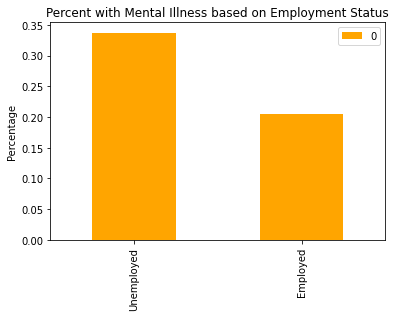

In [ ]:

employment_percentages.plot(kind='bar',  color='orange', title='Percent with Mental Illness based on Employment Status', ylabel='Percentage', xlabel='')

In [ ]:
low_salary.shape

(109, 31)

In [ ]:
high_salary.shape

(217, 31)

In [ ]:
low_salary[low_salary['has_mental_illness'] == 1].shape

(19, 31)

In [ ]:
high_salary[high_salary['has_mental_illness'] == 1].shape

(58, 31)

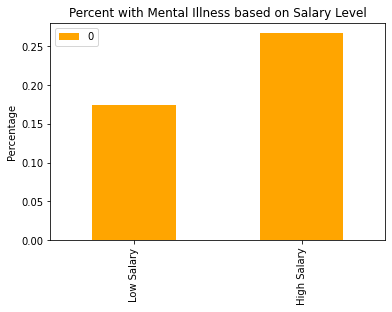

In [ ]:
salary_percentages = pd.DataFrame({'Low Salary':[19/109], 'High Salary':[58/217]})
salary_percentages = salary_percentages.T

salary_percentages.plot(kind='bar',  color='orange', title='Percent with Mental Illness based on Salary Level', ylabel='Percentage', xlabel='')

**Statistical Tests**

In [ ]:
# rows are have mental illness and doesn't have mental illness, columns are employed and unemployed
employed_table = [[50,29],
                  [195, 57]]

stat, p, dof, expected = chi2_contingency(employed_table)
print('Statistic: {}'.format(stat))
print('P Value: {}'.format(p))
print('Expected Frequencies')
print(expected)

Statistic: 5.497676217935203
P Value: 0.01904176155721139
Expected Frequencies
[[ 58.47432024  20.52567976]
 [186.52567976  65.47432024]]


In [ ]:
# rows are have mental illness and doesn't have mental illness, columns are low salary and high salary
salary_table = [[19,58],
                  [90, 159]]

stat, p, dof, expected = chi2_contingency(salary_table)
print('Statistic: {}'.format(stat))
print('P Value: {}'.format(p))
print('Expected Frequencies')
print(expected)

Statistic: 2.9798667436441297
P Value: 0.08430621321734505
Expected Frequencies
[[ 25.74539877  51.25460123]
 [ 83.25460123 165.74539877]]


In order to analyze my alternative causal mechanism, I developed bar charts to show the difference in percentages of people with mental illness and those percentages without in unemployed vs employed categories as well as lower vs higher salary ranges. I then ran chi-squared tests to understand the statistical differences between the groups. The employment data showed a statisitical difference in people with and without mental illness in employed vs unemployed categories with a p-value of 0.019. However, the salary data did not show a strong statistical difference in people with and without mental illness in lower vs higher salary ranges with a p-value of 0.08. 

The article was able to find much lower p-values, with values below 0.001. Therefore, it is conclusive to find that perhaps the article actually had a stronger causal relationship in that groups with more severe mental health were more likely to be unemployed or have lower salaries, rather than groups that were unemployed or had lower salaries have people who were more likely to have mental illness. 

# Discuss

{ Discuss the who/what/where/when/why/how of your analysis comparing an alternative causal mechanism to the author’s mechanism. Other data, methods, mechanisms to explore in future? }

My analysis in comparing an alternative causal mechanism to the author's mechanism included a discussion of plausible alternative casual mechanism, choosing one, and then doing an investigation and discussion of the strength and possibility of this alternative casual mechanism being worthwhile to investigate. I chose to go with the alternative causal mechanism that unemployment and lower salaries could cause mental illness, where the exploratory variables were unemployment vs employed and low vs high salary, adn the dependent variable was mental illness classification. I then performed an EDA using mental health and employment data from a Kaggle survey. I cleaned the dataset, reorganized it, and then performed analyses using visualizations and statistical tests to examine the likelihood of a person to have a mental illness based on whether they were unemployed or had a lower salary. Ultimately, I found that there was a statistical difference in the number of people who had a mental illness in the unemployed vs employed group, however, there was not a strong statistical difference in the lower vs higher salary groups. In fact, the percentage of people with mental illness was actually higher in the higher salary group. I then utilized the p-values to determine if my investigation into this alternative causal mechanism was more statistically signifcant than the article's. Unfortunately, the alternative causual mechanism being examined proved to be less statistically significant with overall higher p-values. This indicates that mental health is more likely to impact unemployment and salary rather than the opposite. 

In order to make this study stronger, further probabilistic models could be built to predict mental health status within the categories of employment or salary, with a larger dataset. For example, a classification model could be formed to classify someone has having a mental illness or not based on their employment status or salary level, which could then be trained and tested on the data and measured for accuracy.

Other causal mechanisms could be:

 Let 
     
      A = severe mental illness
      X = likelihood of unemployment
      Y = lower average salary

Alternative causal relationships could include:
* Simple causation: X causes A or Y causes A
* Simple causation: A causes X or A causes Y

In addition, further exploration in this study coudl examine the impact of different types of mental illnesses, locational mental illness, or education level. 

#Works Cited

“The Impact of Unemployment on Mental Health: Mental Health Blog.” Mental Health Program at Banyan Treatment Centers, 29 July 2020, www.banyanmentalhealth.com/2020/07/06/impact-of-unemployment-on-mental-health/#:~:text=A survey of American citizens,weeks or longer getting treatment.


Luciano, Alison, and Ellen Meara. “Employment Status of People with Mental Illness: National Survey Data from 2009 and 2010.” Psychiatric Services (Washington, D.C.), U.S. National Library of Medicine, Oct. 2014, www.ncbi.nlm.nih.gov/pmc/articles/PMC4182106/.


Michael Corley, MBA. “Unemployment and Mental Illness Survey.” Kaggle, 2 Apr. 2019, www.kaggle.com/datasets/michaelacorley/unemployment-and-mental-illness-survey.